## 2026 EY AI & Data Challenge - TerraClimate Demonstration Notebook

This notebooks demonstrates how to access the TerraClimate dataset. TerraClimate is a dataset of monthly climate and climatic water balance for global terrestrial surfaces from 1958 to the present. These data provide important inputs for ecological and hydrological studies at global scales that require high spatial resolution and time-varying data. All data have monthly temporal resolution and a ~4-km (1/24th degree) spatial resolution. This dataset is provided in Zarr format. 

For more information, visit: https://planetarycomputer.microsoft.com/dataset/terraclimate#overview 

## Load Python Dependencies

In [1]:
# Supress Warnings 
import warnings
warnings.filterwarnings('ignore')

# Import common GIS tools
import xarray as xr

# Import Planetary Computer tools
import pystac_client
import planetary_computer 

## Loading TerraClimate Data

In [2]:
# Access STAC catalog and collection.
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace)

collection = catalog.get_collection("terraclimate")
asset = collection.assets["zarr-abfs"]

In [3]:
# Open dataset and remove CRS.
ds = xr.open_dataset(asset.href,**asset.extra_fields["xarray:open_kwargs"])
ds = ds.drop('crs', dim=None) # Remove the CRS coordinate in the dataset
ds

<xarray.Dataset> Size: 2TB
Dimensions:  (time: 768, lat: 4320, lon: 8640)
Coordinates:
  * lat      (lat) float64 35kB 89.98 89.94 89.9 89.85 ... -89.9 -89.94 -89.98
  * lon      (lon) float64 69kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 6kB 1958-01-01 1958-02-01 ... 2021-12-01
Data variables: (12/14)
    aet      (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    def      (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    pdsi     (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    pet      (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    ppt      (time, lat, lon) float64 229GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    q        (time, lat, lon) float64 229GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    ...       ...
    swe      (time, lat, lon) float64 229GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    tmax     (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    tmin     (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    vap      (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    vpd      (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
    ws       (time, lat, lon) float32 115GB dask.array<chunksize=(12, 1024, 1024), meta=np.ndarray>
Attributes: (12/52)
    Conventions:                     CF-1.6
    acknowledgment:                  Please cite the references included here...
    cdm_data_type:                   GRID
    contributor_email:               khegewisch@ucmerced.edu
    contributor_name:                Katherine Hegewisch
    contributor_role:                Postdoctoral Fellow
    ...                              ...
    time_coverage_duration:          P1Y
    time_coverage_end:               1958-12-01T00:0
    time_coverage_resolution:        P1M
    time_coverage_start:             1958-01-01T00:0
    title:                           TerraClimate: monthly climate and climat...
    version:                         v1.0

A list of the available parameters is shown below:
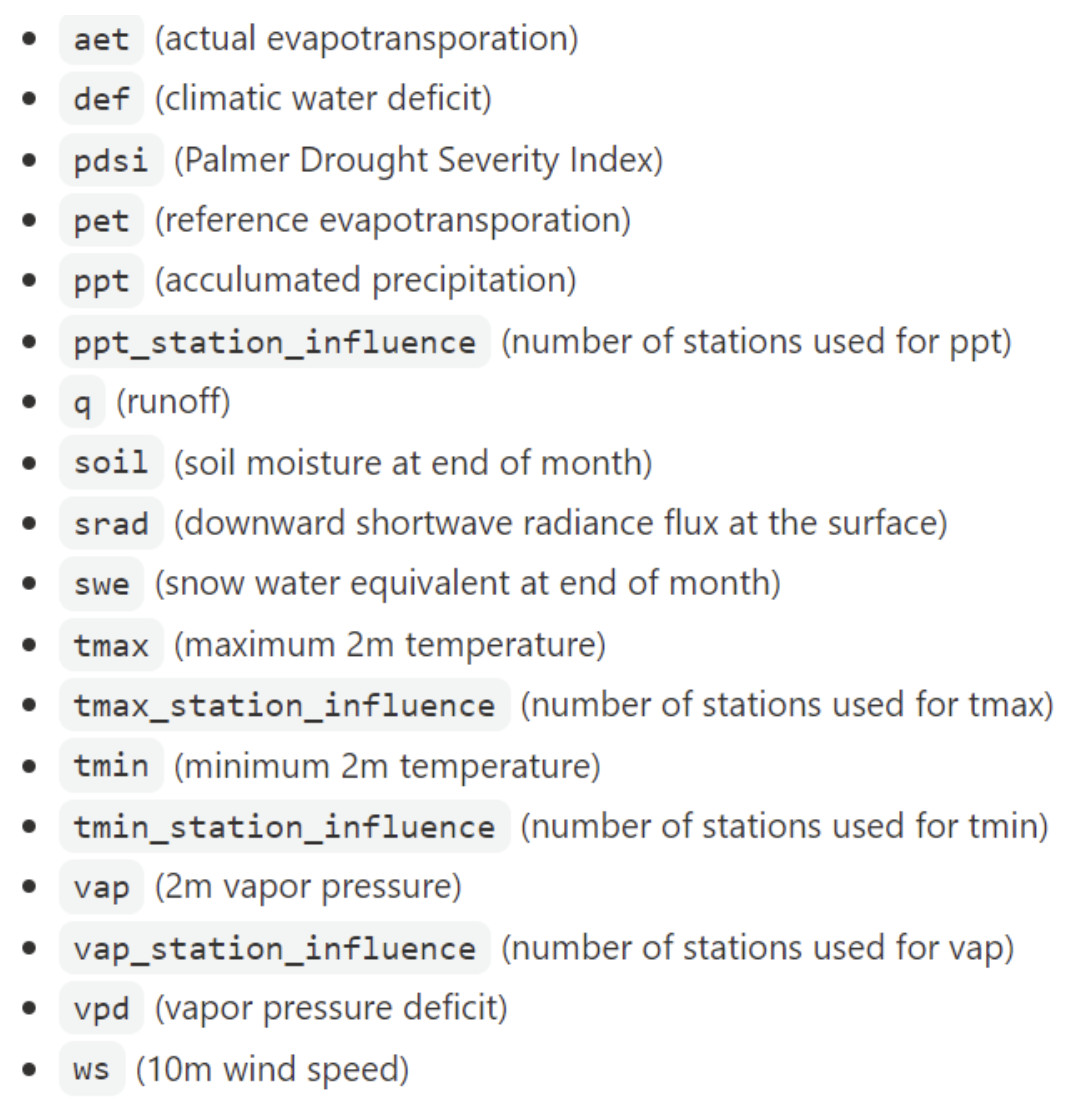

In [4]:
# Since this is a HUGE dataset (nearly 2 TB), we should parse the dataset
# Trimming dataset to years 2011 through 2015
ds = ds.sel(time=slice("2011-01-01", "2015-12-31"))

In [5]:
# Sample region in South Africa
# Contains Water Quality Sample Site #184 and #186 on Wilge River
lat_long = (-27.2923, 28.5365) # Lat-Lon centroid location
box_size_deg = 0.15 # Surrounding box in degrees

In [6]:
# Calculate the Lat-Lon bounding box region
min_lon = lat_long[1]-box_size_deg/2
min_lat = lat_long[0]-box_size_deg/2
max_lon = lat_long[1]+box_size_deg/2
max_lat = lat_long[0]+box_size_deg/2

In [7]:
mask_lon = (ds.lon >= min_lon) & (ds.lon <= max_lon)
mask_lat = (ds.lat >= min_lat) & (ds.lat <= max_lat)

In [8]:
# Crop the dataset to smaller Lat-Lon regions
ds = ds.where(mask_lon & mask_lat, drop=True)
ds

<xarray.Dataset> Size: 66kB
Dimensions:  (time: 60, lat: 4, lon: 4)
Coordinates:
  * lat      (lat) float64 32B -27.23 -27.27 -27.31 -27.35
  * lon      (lon) float64 32B 28.48 28.52 28.56 28.6
  * time     (time) datetime64[ns] 480B 2011-01-01 2011-02-01 ... 2015-12-01
Data variables: (12/14)
    aet      (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    def      (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    pdsi     (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    pet      (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    ppt      (time, lat, lon) float64 8kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    q        (time, lat, lon) float64 8kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    ...       ...
    swe      (time, lat, lon) float64 8kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    tmax     (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    tmin     (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    vap      (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    vpd      (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
    ws       (time, lat, lon) float32 4kB dask.array<chunksize=(12, 4, 4), meta=np.ndarray>
Attributes: (12/52)
    Conventions:                     CF-1.6
    acknowledgment:                  Please cite the references included here...
    cdm_data_type:                   GRID
    contributor_email:               khegewisch@ucmerced.edu
    contributor_name:                Katherine Hegewisch
    contributor_role:                Postdoctoral Fellow
    ...                              ...
    time_coverage_duration:          P1Y
    time_coverage_end:               1958-12-01T00:0
    time_coverage_resolution:        P1M
    time_coverage_start:             1958-01-01T00:0
    title:                           TerraClimate: monthly climate and climat...
    version:                         v1.0

## Exploring the Data

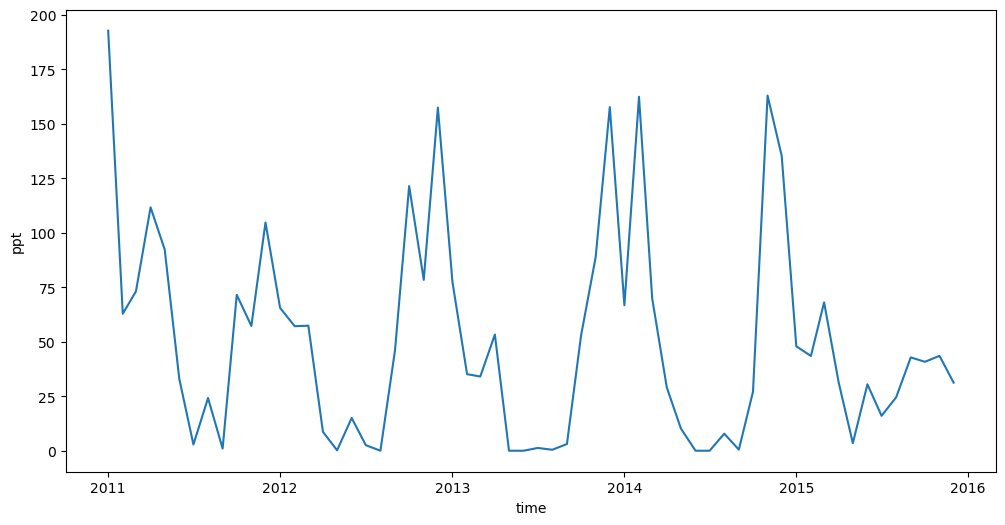

In [9]:
# Plot monthly accumulated precipitation over the region for 5 years
temperature = ds["ppt"].mean(dim=["lat", "lon"])
temperature.plot(figsize=(12, 6));

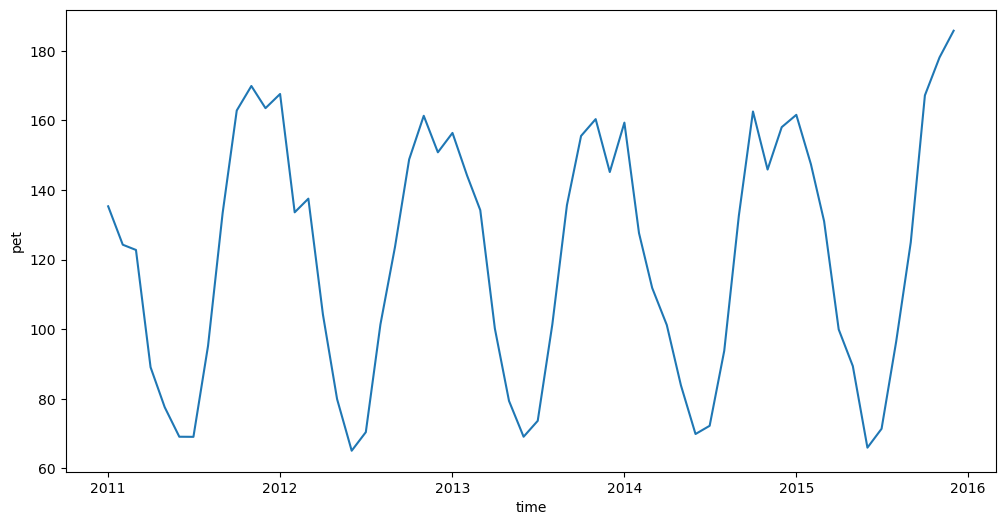

In [10]:
# Plot monthly reference evapotransporation over the region for 5 years
temperature = ds["pet"].mean(dim=["lat", "lon"])
temperature.plot(figsize=(12, 6));